# Phase 1: Data Preparation

## Import Libraries 

In [1]:
import cv2
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from tensorflow.keras.preprocessing import image
from scipy import ndimage

## Sobel Filtering

In [2]:
img = cv2.imread('baby.png', 0)
print(img.shape)

(512, 512)


In [3]:
# Sobel Filtering
def sobel_filters(img):
    img = np.asarray(img, dtype = float)
    
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    # theta = np.arctan2(Iy, Ix)
    
    return G

In [4]:
edge = sobel_filters(img)

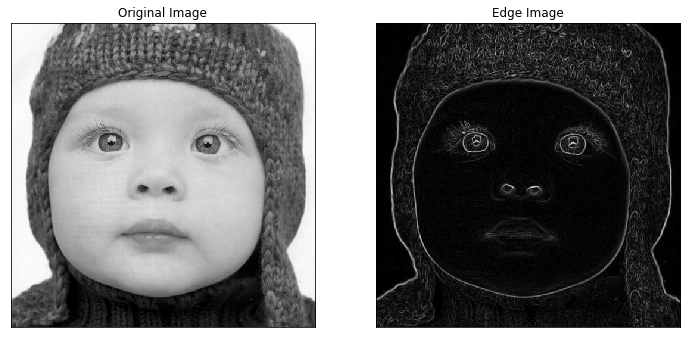

In [5]:
# plt.imshow(edges, cmap = 'gray')
plt.figure(figsize = (12, 10))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edge ,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
print(edge.shape)

(512, 512)


## Edge Hierarchy Gen

In [7]:
# Get image data path
srcImgName = glob.glob("./data/Train/*.png")

In [8]:
# Sobel Filtering
def sobel_filters(img):
    img = np.asarray(img, dtype = float)
    
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    # theta = np.arctan2(Iy, Ix)
    
    return G

In [9]:
_srcImg = cv2.imread(srcImgName[1])
_srcImg = cv2.cvtColor(_srcImg, cv2.COLOR_BGR2GRAY)
edges = sobel_filters(_srcImg)

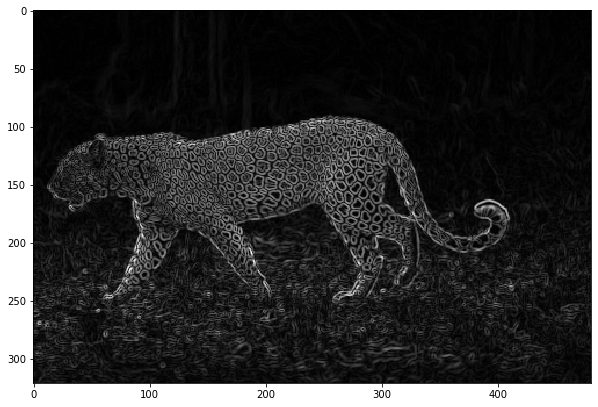

In [10]:
plt.figure(figsize = (10, 10))
plt.imshow(edges, cmap = 'gray')
plt.show()

In [11]:
print(edges.max(), np.amax(edges))

255.0 255.0


In [12]:
# Crop, Split and Save Patches to Edge and No-Edge Data Folders
print("IT MAY TAKE A WHILE, PLEASE WAIT...")

win_size = 14
    
for i in range(len(srcImgName)):
# for i in range(2):
    _srcImg = cv2.imread(srcImgName[i])
    _srcImg = cv2.cvtColor(_srcImg, cv2.COLOR_BGR2GRAY)
    
    # edges = cv2.Canny(_srcImg, 100, 200)
    edges = sobel_filters(_srcImg)
    
#     plt.figure(figsize = (10, 10))
#     plt.imshow(edges, cmap = 'gray')
#     plt.show()
    
    name_srcImg = os.path.basename(srcImgName[i])
    
    step_x = _srcImg.shape[1]//win_size
    step_y = _srcImg.shape[0]//win_size
    
    # Crop and save
    for k in range(step_y - 1):
        for j in range(step_x - 1):
            from_x = j*_srcImg.shape[0]//step_x
            from_y = k*_srcImg.shape[1]//step_y
            to_x = from_x + win_size
            to_y = from_y + win_size
            
            img_patch = _srcImg[from_y:to_y, from_x:to_x]
            edge_patch = edges[from_y:to_y, from_x:to_x]
        
            strong_edge_path = "./data/train_strong_edges/" + str(k) + str(j) + name_srcImg
            weak_edge_path = "./data/train_weak_edges/" + str(k) + str(j) + name_srcImg
            non_edge_path = "./data/train_non_edges/" + str(k) + str(j) + name_srcImg
            
            if img_patch.shape == (14, 14):
                max_pixel = np.amax(edge_patch)
                
                if max_pixel < 50:
                    cv2.imwrite(non_edge_path, img_patch)

                elif max_pixel > 150: 
                    cv2.imwrite(strong_edge_path, img_patch)
                
                else:
                    cv2.imwrite(weak_edge_path, img_patch)

print("DONE!")

IT MAY TAKE A WHILE, PLEASE WAIT...
DONE!


In [13]:
strong_edge_path = glob.glob("./data/train_strong_edges/*.png")
weak_edge_path = glob.glob("./data/train_weak_edges/*.png")
non_edge_path = glob.glob("./data/train_non_edges/*.png")

In [24]:
print(len(strong_edge_path), len(weak_edge_path), len(non_edge_path))

33644 79550 72161


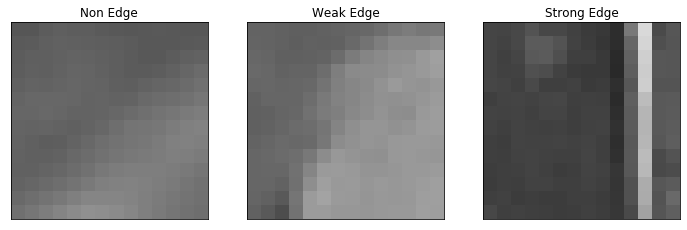

In [25]:
# Visualize Sample Data
plt.figure(figsize = (12, 10))
plt.subplot(131),plt.imshow(cv2.imread(non_edge_path[randint(0, len(non_edge_path))]),cmap = 'gray')
plt.title('Non Edge'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(cv2.imread(weak_edge_path[randint(0, len(weak_edge_path))]) ,cmap = 'gray')
plt.title('Weak Edge'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(cv2.imread(strong_edge_path[randint(0, len(strong_edge_path))]) ,cmap = 'gray')
plt.title('Strong Edge'), plt.xticks([]), plt.yticks([])
plt.show()

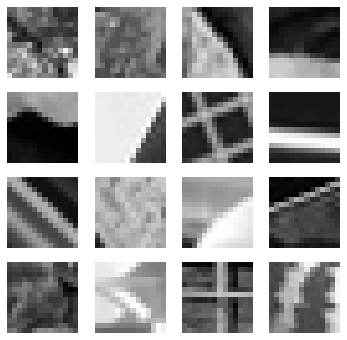

In [26]:
# Display Strong Edge Samples
r, c = 4, 4

fig, axs = plt.subplots(r, c, figsize=(6, 6))

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(cv2.imread(strong_edge_path[randint(0, len(strong_edge_path))]), cmap = 'gray')
        axs[i,j].axis('off')

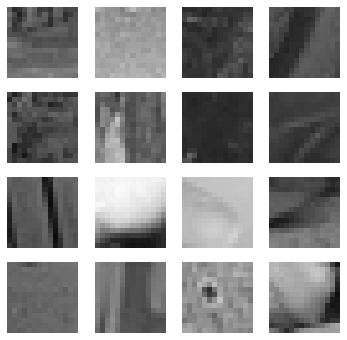

In [27]:
# Display Weak Edge Samples
r, c = 4, 4

fig, axs = plt.subplots(r, c, figsize=(6, 6))

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(cv2.imread(weak_edge_path[randint(0, len(weak_edge_path))]), cmap = 'gray')
        axs[i,j].axis('off')

In [29]:
for i in range(10):
    print(cv2.imread(weak_edge_path[randint(0, len(weak_edge_path))]).max())

145
200
156
217
92
154
140
200
126
141


In [30]:
# Check if there is data which got incorrect shape
print("IT MAY TAKE A WHILE, PLEASE WAIT...")

wrong_data = 0
standard_shape = (14, 14)

for x in range(len(strong_edge_path)):
    if cv2.imread(strong_edge_path[x], 0).shape != standard_shape:
        print(cv2.imread(strong_edge_path[x], 0).shape, x)
        wrong_data += 1
        break
        
for x in range(len(weak_edge_path)):
    if cv2.imread(weak_edge_path[x], 0).shape != standard_shape:
        print(cv2.imread(weak_edge_path[x], 0).shape, x)
        wrong_data += 1
        break
        
for x in range(len(non_edge_path)):
    if cv2.imread(non_edge_path[x], 0).shape != standard_shape:
        print(cv2.imread(non_edge_path[x], 0).shape, x)
        wrong_data += 1
        break
        
if wrong_data == 0: print("Data got correct shape!")
else: print("There is data which got incorrect shape!")
    
print("DONE!")

IT MAY TAKE A WHILE, PLEASE WAIT...
Data got correct shape!
DONE!


## Visualize Data

In [31]:
strong_edge_src = glob.glob("./data/train_strong_edges/*.png")
weak_edge_src = glob.glob("./data/train_weak_edges/*.png")

(14, 14) (14, 14)


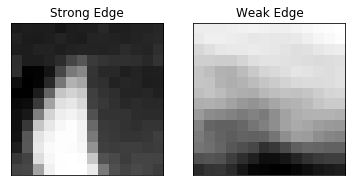

In [40]:
strong_edge_img = cv2.imread(strong_edge_src[randint(0, len(strong_edge_src))], 0)
weak_edge_img = cv2.imread(weak_edge_src[randint(0, len(weak_edge_src))], 0)
print(strong_edge_img.shape, weak_edge_img.shape)

plt.subplot(121),plt.imshow(strong_edge_img ,cmap = 'gray')
plt.title('Strong Edge'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(weak_edge_img ,cmap = 'gray')
plt.title('Weak Edge'), plt.xticks([]), plt.yticks([])
plt.show()

(7, 7)


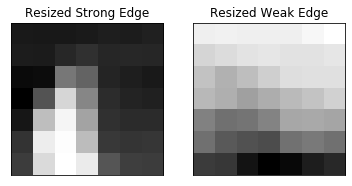

In [42]:
# Resize to get Low Resolution Image
resized_strong_edge_img = cv2.resize(strong_edge_img, (strong_edge_img.shape[0]//2, strong_edge_img.shape[1]//2))
resized_weak_edge_img = cv2.resize(weak_edge_img, (strong_edge_img.shape[0]//2, strong_edge_img.shape[1]//2))
print(resized.shape)

plt.subplot(121),plt.imshow(resized_strong_edge_img ,cmap = 'gray')
plt.title('Resized Strong Edge'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(resized_weak_edge_img ,cmap = 'gray')
plt.title('Resized Weak Edge'), plt.xticks([]), plt.yticks([])
plt.show()

(14, 14)


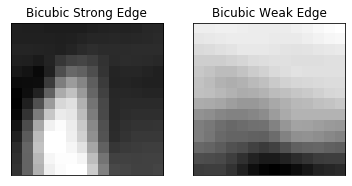

In [43]:
# Bicubic Interpolation
bicubic_strong_edge = cv2.resize(resized_strong_edge_img, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
bicubic_weak_edge = cv2.resize(resized_weak_edge_img, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
print(bicubic_strong_edge.shape)

plt.subplot(121),plt.imshow(bicubic_strong_edge ,cmap = 'gray')
plt.title('Bicubic Strong Edge'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(bicubic_weak_edge ,cmap = 'gray')
plt.title('Bicubic Weak Edge'), plt.xticks([]), plt.yticks([])
plt.show()

# Phase 2: Train and Test Model

# 1. Strong Edge Set

## Prepare Data

In [44]:
TRAIN_IMAGES = glob.glob('./data/train_strong_edges/*.png')
print(TRAIN_IMAGES[0], len(TRAIN_IMAGES))

./data/train_strong_edges/44169012.png 33644


In [45]:
# Prepare Training Data
print("PLEASE WAIT...")

# Original
ori_size = 14

# HR Set
hr_size = 10
hr_images_list = np.zeros((len(TRAIN_IMAGES), hr_size, hr_size, 1))

# LR Set
lr_size = 7
lr_images_list = np.zeros((len(TRAIN_IMAGES), lr_size, lr_size, 1))

for i, fig in enumerate(TRAIN_IMAGES):
    img = image.load_img(fig, color_mode = 'grayscale', target_size=(ori_size, ori_size))
    img = np.asarray(img)
    
    lr = cv2.resize(img, (lr_size, lr_size))
    
    img = img[2:12, 2:12]
    
    hr = image.img_to_array(img).astype('float32')
    lr = image.img_to_array(lr).astype('float32')
    
    hr = hr / 255.0
    lr = lr / 255.0
    
    hr_images_list[i] = hr        # Label
    lr_images_list[i] = lr        # Input
    
print("DONE!")

PLEASE WAIT...
DONE!


In [46]:
print(hr_images_list.shape, lr_images_list.shape)

(33644, 10, 10, 1) (33644, 7, 7, 1)


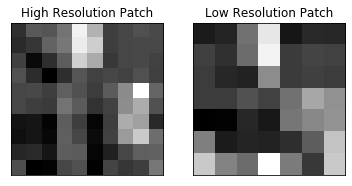

In [47]:
index = randint(0, len(hr_images_list))

plt.subplot(121), plt.imshow(hr_images_list[index].reshape(10, 10), cmap = 'gray')
plt.title("High Resolution Patch"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(lr_images_list[index].reshape(7, 7), cmap = 'gray')
plt.title("Low Resolution Patch"), plt.xticks([]), plt.yticks([])
plt.show()

In [48]:
def train_val_split(x_train, y_train):
    rnd = np.random.RandomState(seed = 42)
    perm = rnd.permutation(len(x_train))
    train_idx = perm[:int(0.8 * len(x_train))]
    val_idx = perm[int(0.8 * len(x_train)):]
    return x_train[train_idx], y_train[train_idx], x_train[val_idx], y_train[val_idx]

In [49]:
x_train, y_train, x_val, y_val = train_val_split(lr_images_list, hr_images_list)
print(x_train.shape, x_val.shape)

(26915, 7, 7, 1) (6729, 7, 7, 1)


## Train CNN Model (Strong Weak)

In [50]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, Dropout, UpSampling2D

In [51]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
# tf.keras.backend.set_session(tf.compat.v1.Session(config=config))
sess = tf.compat.v1.Session(config=config)

In [52]:
class CNN_Model():
    def __init__(self):
        self.img_rows = 7
        self.img_cols = 7
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        
        optimizer = Adam(lr=0.001)
        
        self.autoencoder_model = self.build_model()
        self.autoencoder_model.compile(loss='mse', optimizer=optimizer)
        self.autoencoder_model.summary()
      
    def build_model(self):
        input_layer = Input(shape=self.img_shape)
        
        # encoding
        h = Conv2D(32, (3, 3), activation='relu', padding='valid')(input_layer)
        h = Conv2D(32, (3, 3), activation='relu', padding='same')(h)
        
        # decoding
        h = UpSampling2D((2, 2))(h)
        h = Conv2D(32, (3, 3), activation='relu', padding='same')(h)
        h = Conv2D(32, (3, 3), activation='relu', padding='same')(h)
        output_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(h)
        
        return Model(input_layer, output_layer)
    
    def train_model(self, x_train, y_train, x_val, y_val, epochs, batch_size=20):
        early_stopping = EarlyStopping(monitor='val_loss',
                                       min_delta=0,
                                       patience=5,
                                       verbose=1, 
                                       mode='auto')
        history = self.autoencoder_model.fit(x_train, y_train,
                                             batch_size=batch_size,
                                             epochs=epochs,
                                             validation_data=(x_val, y_val),
                                             callbacks=[early_stopping])
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')                                                          
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()
    
    def eval_model(self, x_test):
        preds = self.autoencoder_model.predict(x_test)
        return preds
    
    def save_model(self):
        self.autoencoder_model.save("cnn_model.h5")

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 7, 7, 1)]         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 5, 5, 32)          320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 5, 5, 32)          9248      
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 1)         289 

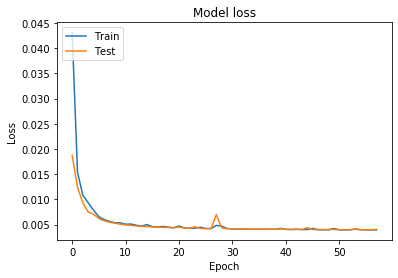

In [135]:
cnn_model = CNN_Model()
cnn_model.train_model(x_train, y_train, x_val, y_val, epochs=1000, batch_size=1000)

In [35]:
# cnn_model.save_model()

In [55]:
index = randint(0, len(hr_images_list))

hr_img = hr_images_list[index].reshape(10, 10)
lr_img = lr_images_list[index].reshape(1, 7, 7, 1)
# bi_img = bi_images_list[index].reshape(10, 10)

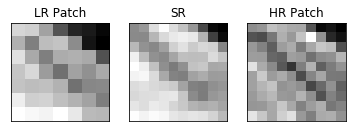

In [56]:
index = randint(0, len(hr_images_list))

lr_img = lr_images_list[index].reshape(7, 7)
pred = cnn_model.eval_model(lr_img.reshape(1, 7, 7, 1)).reshape(10, 10)        # prediction
hr_img = hr_images_list[index].reshape(10, 10)

plt.subplot(131), plt.imshow(lr_img, cmap = 'gray')
plt.title("LR Patch"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(pred, cmap = 'gray')
plt.title("SR"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(hr_img, cmap = 'gray')
plt.title("HR Patch"), plt.xticks([]), plt.yticks([])
plt.show()

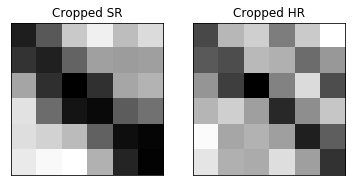

In [57]:
cropped_hr = hr_img[2:8, 2:8]
cropped_sr = pred[2:8, 2:8]

# cropped_hr = hr_img[1:9, 1:9]
# cropped_sr = pred[1:9, 1:9]

plt.subplot(121), plt.imshow(cropped_sr, cmap = 'gray')
plt.title("Cropped SR"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cropped_hr, cmap = 'gray')
plt.title("Cropped HR"), plt.xticks([]), plt.yticks([])
plt.show()

# 2. Weak Edge Set

## Prepare Data

In [122]:
TRAIN_IMAGES_1 = glob.glob('./data/train_weak_edges/*.png')
print(TRAIN_IMAGES_1[0], len(TRAIN_IMAGES_1))

./data/train_weak_edges/43t3.png 79550


In [123]:
# Prepare Training Data
print("PLEASE WAIT...")

# Original
ori_size = 14

# HR Set
hr_size = 10
hr_images_list_1 = np.zeros((len(TRAIN_IMAGES_1), hr_size, hr_size, 1))

# LR Set
lr_size = 7
lr_images_list_1 = np.zeros((len(TRAIN_IMAGES_1), lr_size, lr_size, 1))

for i, fig in enumerate(TRAIN_IMAGES_1):
    img = image.load_img(fig, color_mode = 'grayscale', target_size=(ori_size, ori_size))
    img = np.asarray(img)
    
    lr = cv2.resize(img, (lr_size, lr_size))
    
    img = img[2:12, 2:12]
    
    hr = image.img_to_array(img).astype('float32')
    lr = image.img_to_array(lr).astype('float32')
    
    hr = hr / 255.0
    lr = lr / 255.0
    
    hr_images_list_1[i] = hr        # Label
    lr_images_list_1[i] = lr        # Input
    
print("DONE!")

PLEASE WAIT...
DONE!


In [124]:
print(hr_images_list_1.shape, lr_images_list_1.shape)

(79550, 10, 10, 1) (79550, 7, 7, 1)


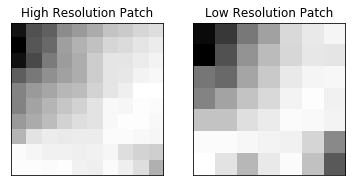

In [125]:
index = randint(0, len(hr_images_list_1))

plt.subplot(121), plt.imshow(hr_images_list_1[index].reshape(10, 10), cmap = 'gray')
plt.title("High Resolution Patch"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(lr_images_list_1[index].reshape(7, 7), cmap = 'gray')
plt.title("Low Resolution Patch"), plt.xticks([]), plt.yticks([])
plt.show()

In [126]:
x_train_1, y_train_1, x_val_1, y_val_1 = train_val_split(lr_images_list_1, hr_images_list_1)
print(x_train_1.shape, x_val_1.shape)

(63640, 7, 7, 1) (15910, 7, 7, 1)


## Train CNN Model (Weak Edge)

In [194]:
class CNN_Model_weak_edge():
    def __init__(self):
        self.img_rows = 7
        self.img_cols = 7
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        
        optimizer = Adam(lr=0.001)
        
        self.autoencoder_model = self.build_model()
        self.autoencoder_model.compile(loss='mse', optimizer=optimizer)
        self.autoencoder_model.summary()
      
    def build_model(self):
        input_layer = Input(shape=self.img_shape)
        
        # encoding
        h = Conv2D(32, (3, 3), activation='relu', padding='valid')(input_layer)
        h = Conv2D(32, (3, 3), activation='relu', padding='same')(h)
        
        # decoding
        h = UpSampling2D((2, 2))(h)
        h = Conv2D(32, (3, 3), activation='relu', padding='same')(h)
        h = Conv2D(32, (3, 3), activation='relu', padding='same')(h)
        output_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(h)
        
        return Model(input_layer, output_layer)
    
    def train_model(self, x_train, y_train, x_val, y_val, epochs, batch_size=20):
        early_stopping = EarlyStopping(monitor='val_loss',
                                       min_delta=0,
                                       patience=5,
                                       verbose=1, 
                                       mode='auto')
        history = self.autoencoder_model.fit(x_train, y_train,
                                             batch_size=batch_size,
                                             epochs=epochs,
                                             validation_data=(x_val, y_val),
                                             callbacks=[early_stopping])
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')                                                          
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()
    
    def eval_model(self, x_test):
        preds = self.autoencoder_model.predict(x_test)
        return preds
    
    def save_model(self):
        self.autoencoder_model.save("cnn_model_weak_edge.h5")

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 7, 7, 1)]         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 5, 5, 32)          320       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 5, 5, 32)          9248      
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 10, 10, 1)         289 

63640/63640 [==============================] - 1s 9us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 65/1000
63640/63640 [==============================] - 1s 9us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 66/1000
63640/63640 [==============================] - 1s 9us/sample - loss: 0.0013 - val_loss: 0.0012
Epoch 67/1000
63640/63640 [==============================] - 1s 9us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 68/1000
63640/63640 [==============================] - 1s 9us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 69/1000
63640/63640 [==============================] - 1s 9us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 70/1000
63640/63640 [==============================] - 1s 9us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 71/1000
63640/63640 [==============================] - 1s 9us/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 72/1000
63640/63640 [==============================] - 1s 9us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 73/1000
63640/63640 [======

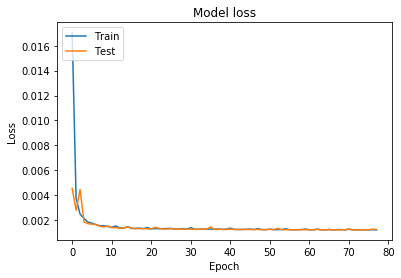

In [195]:
cnn_model_1 = CNN_Model_weak_edge()
cnn_model_1.train_model(x_train_1, y_train_1, x_val_1, y_val_1, epochs=1000, batch_size=1000)

## Reconstruct Image

In [58]:
import math

(256, 256) (256, 256)


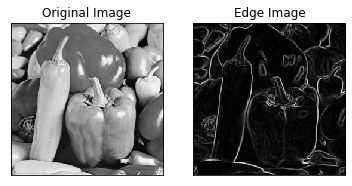

In [206]:
# src_img = cv2.imread("baby.png", 0)
# src_img_base_name = "baby"

img = cv2.imread("pepper_gray_256.jpg", 0)

# img = cv2.resize(img, (img.shape[0]//2, img.shape[1]//2))

edge = sobel_filters(img)
print(img.shape, edge.shape)

# cv2.imwrite("baby_gray_128.jpg", img_2)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edge, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [207]:
# cv2.imwrite(src_img_base_name + "_gray_512.jpg", src_img)
# cv2.imwrite(src_img_base_name + "_gray_256.jpg", img)

In [208]:
# Generate LR Patches, Edge Patches, Bicubic Patches
print("PLEASE WAIT...")

win_H = win_W = 7
stride = 3              # <==== VERY IMPORTANT!!! ====>
  
patches = []            # low resolution patches
edge_patches = []       # respective edge patches
bic_patches = []

for i in range(img.shape[1]//stride - 1):
    for j in range(img.shape[0]//stride - 1):

        from_x = j*stride
        from_y = i*stride
        to_x = j*stride + win_W
        to_y = i*stride + win_H
            
        lr_patch = img[from_y:to_y, from_x:to_x]       
        edge_patch = edge[from_y:to_y, from_x:to_x]
        bic_patch = cv2.resize(lr_patch, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
        
        patches.append(lr_patch)
        edge_patches.append(edge_patch)
        bic_patches.append(bic_patch)
        
print("DONE!")

PLEASE WAIT...
DONE!


(7056, 7, 7) (7056, 7, 7) (7056, 14, 14)


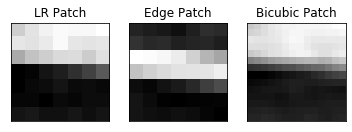

In [209]:
# Make Patches array 
patches = np.asarray(patches)
edge_patches = np.asarray(edge_patches)
bic_patches = np.asarray(bic_patches)
print(patches.shape, edge_patches.shape, bic_patches.shape)

# Visualize Relative Patches
index = randint(0, patches.shape[0])

plt.subplot(131), plt.imshow(patches[index], cmap = 'gray')
plt.title("LR Patch"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(edge_patches[index], cmap = 'gray')
plt.title("Edge Patch"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(bic_patches[index], cmap = 'gray')
plt.title("Bicubic Patch"), plt.xticks([]), plt.yticks([])
plt.show()

In [210]:
# Normalize
patches = patches/255.0
bic_patches = bic_patches/255.0

# Check range of value
print(np.amax(edge_patches[index]), np.amax(patches[index]), np.amax(bic_patches[index]))

148.38468194674442 0.8117647058823529 0.8196078431372549


In [211]:
# print(patches[index]*255)

In [212]:
# patches = patches*255
# bic_patches = bic_patches*255
# print(np.amax(patches[index]), np.amax(bic_patches[index]))

In [213]:
# === PREDICTION === #

patches = patches.reshape(patches.shape[0], 7, 7, 1)

sr_strg_edge_patches = cnn_model.eval_model(patches)
sr_strg_edge_patches = sr_strg_edge_patches.reshape(sr_strg_edge_patches.shape[0], 10, 10)

sr_weak_edge_patches = cnn_model_1.eval_model(patches)
sr_weak_edge_patches = sr_weak_edge_patches.reshape(sr_weak_edge_patches.shape[0], 10, 10)

print(sr_strg_edge_patches.shape, sr_weak_edge_patches.shape)

(7056, 10, 10) (7056, 10, 10)


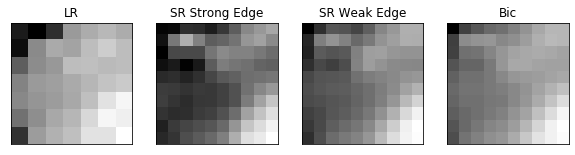

In [214]:
index = randint(0, len(sr_strg_edge_patches))

lr = patches[index].reshape(7, 7)
sr_strg_edge = cnn_model.eval_model(lr.reshape(1, 7, 7, 1)).reshape(10, 10)          # strg-edge prediction
sr_weak_edge = cnn_model_1.eval_model(lr.reshape(1, 7, 7, 1)).reshape(10, 10)        # weak-edge prediction

plt.figure(figsize = (10, 12))
plt.subplot(141), plt.imshow(lr, cmap = 'gray')
plt.title("LR"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(sr_strg_edge, cmap = 'gray')
plt.title("SR Strong Edge"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(sr_weak_edge, cmap = 'gray')
plt.title("SR Weak Edge"), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(bic_patches[index][2:12, 2:12], cmap = 'gray')
plt.title("Bic"), plt.xticks([]), plt.yticks([])
plt.show()

In [215]:
hstack = []
row = 0

one_dim_len = int(math.sqrt(patches.shape[0]))

for x in range(one_dim_len):     
    rec_sr = sr_strg_edge_patches[one_dim_len*row]
    
    # Crop center region of piece ---- cropped = img[from_y:to_y, from_x:to_x]
    rec_sr = rec_sr[2:8, 2:8]
    
    # print(rec_sr.shape)
    
    for y in range(one_dim_len - 1):
        if np.amax(edge_patches[one_dim_len*row + y + 1]) < 50:
            cropped_piece = bic_patches[one_dim_len*row + y + 1]
            cropped_piece = cropped_piece[2:8, 2:8]
        
            rec_sr = np.hstack((rec_sr, cropped_piece))

        else:  
            if np.amax(edge_patches[one_dim_len*row + y + 1]) > 150:
                cropped_piece = sr_strg_edge_patches[one_dim_len*row + y + 1]
                cropped_piece = cropped_piece[2:8, 2:8]

                rec_sr = np.hstack((rec_sr, cropped_piece))
                
            else:
                cropped_piece = sr_weak_edge_patches[one_dim_len*row + y + 1]
                cropped_piece = cropped_piece[2:8, 2:8]

                rec_sr = np.hstack((rec_sr, cropped_piece))
    
    row += 1
    hstack.append(rec_sr)

hstack = np.asarray(hstack)
hstack.shape

(84, 6, 504)

In [216]:
# # PREDICTION ON 1 MODEL

# hstack = []
# row = 0

# one_dim_len = int(math.sqrt(patches.shape[0]))

# for x in range(one_dim_len):     
#     rec_sr = sr_patches[one_dim_len*row]
    
#     # Crop center region of piece ---- cropped = img[from_y:to_y, from_x:to_x]
#     rec_sr = rec_sr[2:8, 2:8]
    
#     # print(rec_sr.shape)
    
#     for y in range(one_dim_len - 1):
#         if np.amax(edge_patches[one_dim_len*row + y + 1]) > 0:
#             cropped_piece = sr_patches[one_dim_len*row + y + 1]
#             cropped_piece = cropped_piece[2:8, 2:8]
        
#             rec_sr = np.hstack((rec_sr, cropped_piece))
#         else:
#             cropped_piece = bic_patches[one_dim_len*row + y + 1]
#             cropped_piece = cropped_piece[2:8, 2:8]
            
#             # print(cropped_piece.shape)
        
#             rec_sr = np.hstack((rec_sr, cropped_piece))
    
#     row += 1
#     hstack.append(rec_sr)

# hstack = np.asarray(hstack)
# hstack.shape

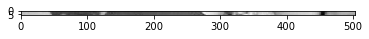

In [217]:
test_img = hstack[3]
test_img = test_img.reshape(hstack.shape[1], hstack.shape[2])
plt.imshow(test_img, cmap='gray')

(504, 504)


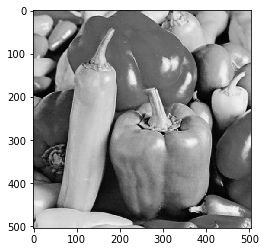

In [218]:
full_rec = hstack[0]
for z in range(one_dim_len - 1):
    full_rec = np.vstack((full_rec, hstack[z + 1]))
full_rec.shape

full_rec = full_rec.reshape(full_rec.shape[0], full_rec.shape[1])
print(full_rec.shape)
plt.imshow(full_rec, cmap='gray')

In [219]:
cv2.imwrite("pepper_EHSRx2_ver3.jpg", full_rec*255)

True

In [414]:
# cv2.imwrite(src_img_base_name + "_sr_bic.jpg", full_rec*255)

True

(512, 512)


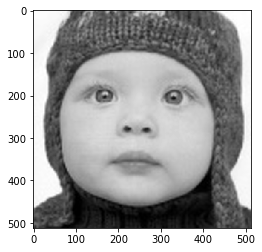

In [133]:
bic_img = cv2.resize(img, None, fx = 4, fy = 4, interpolation = cv2.INTER_CUBIC)
print(bic_img.shape)
plt.imshow(bic_img, cmap='gray')

In [134]:
cv2.imwrite("baby_Bicx4_from_128.jpg", bic_img)

True

In [416]:
# cv2.imwrite(src_img_base_name + "_bic.jpg", bic_img)

True

## Calculate MSE

In [70]:
import cv2
import math
import matplotlib.pyplot as plt

In [220]:
# Load Images

src_img_base_name = "pepper"

# hr_img = cv2.imread(src_img_base_name + "_gray_512.jpg", 0)
# sr_img = cv2.imread(src_img_base_name + "_sr_bic.jpg", 0)
# bi_img = cv2.imread(src_img_base_name + "_bic.jpg", 0)
# srcnn = cv2.imread(src_img_base_name + "_gray_srcnn_x2_1000.jpg", 0)
# subpixel = cv2.imread(src_img_base_name + "_gray_subpixel_x2_1000.jpg", 0)
# print(hr_img.shape, sr_img.shape, bi_img.shape, srcnn.shape, subpixel.shape)

hr_img = cv2.imread(src_img_base_name + "_gray_512.jpg", 0)
bi_img = cv2.imread(src_img_base_name + "_bic.jpg", 0)
ehsr_1 = cv2.imread(src_img_base_name + "_sr_bic.jpg", 0)
ehsr_2 = cv2.imread(src_img_base_name + "_EHSRx2_ver2.jpg", 0)
ehsr_3 = cv2.imread(src_img_base_name + "_EHSRx2_ver3.jpg", 0)

In [221]:
start_point = 10
delta = 10
sr_img = ehsr_1

# Crop to get the same shape
hr_img_cropped = hr_img[start_point:start_point+sr_img.shape[0]-delta, start_point:start_point+sr_img.shape[0]-delta]

bi_img_cropped = bi_img[start_point:start_point+sr_img.shape[0]-delta, start_point:start_point+sr_img.shape[0]-delta]

ehsr_1_cropped = ehsr_1[start_point-2:start_point-2+sr_img.shape[0]-delta, start_point-2:start_point-2+sr_img.shape[0]-delta]

ehsr_2_cropped = ehsr_2[start_point-4:start_point-4+sr_img.shape[0]-delta, start_point-4:start_point-4+sr_img.shape[0]-delta]

ehsr_3_cropped = ehsr_3[start_point-4:start_point-4+sr_img.shape[0]-delta, start_point-4:start_point-4+sr_img.shape[0]-delta]

# srcnn_cropped = srcnn[start_point:start_point+sr_img.shape[0]-delta, start_point:start_point+sr_img.shape[0]-delta]
# subpixel_cropped = subpixel[start_point:start_point+sr_img.shape[0]-delta, start_point:start_point+sr_img.shape[0]-delta]

print(hr_img_cropped.shape, bi_img_cropped.shape, ehsr_1_cropped.shape, ehsr_2_cropped.shape, ehsr_3_cropped.shape)
print("\n HR Image = ")
print(hr_img_cropped)
print("\n Bic Image = ")
print(bi_img_cropped)
print("\n EHSR 1 Image = ")
print(ehsr_1_cropped)
print("\n EHSR 2 Image = ")
print(ehsr_2_cropped)
print("\n EHSR 3 Image = ")
print(ehsr_3_cropped)
# print("\n SubPixel Image = ")
# print(srcnn_cropped)

(494, 494) (494, 494) (494, 494) (494, 494) (494, 494)

 HR Image = 
[[106 105 105 ... 174 177 172]
 [102 112 102 ... 176 173 171]
 [111 103 111 ... 173 172 168]
 ...
 [119  83 124 ... 188 142 158]
 [153 132 142 ... 190 183 145]
 [143 141 154 ... 190 183 183]]

 Bic Image = 
[[106 107 109 ... 178 174 171]
 [105 105 106 ... 178 174 171]
 [105 105 104 ... 177 175 172]
 ...
 [126 113 122 ... 169 157 158]
 [141 131 136 ... 179 167 164]
 [150 142 144 ... 193 185 178]]

 EHSR 1 Image = 
[[106 107 109 ... 178 174 171]
 [105 106 105 ... 177 174 171]
 [105 105 103 ... 177 175 172]
 ...
 [112 103 118 ... 179 146 152]
 [144 131 137 ... 180 171 165]
 [153 141 142 ... 190 188 174]]

 EHSR 2 Image = 
[[106 109 108 ... 180 177 174]
 [105 108 106 ... 180 178 173]
 [104 106 105 ... 178 175 173]
 ...
 [121 107 119 ... 178 148 154]
 [144 137 142 ... 191 177 168]
 [157 150 150 ... 191 190 184]]

 EHSR 3 Image = 
[[106 105 105 ... 179 180 179]
 [104 105 105 ... 178 181 180]
 [104 104 101 ... 179 181 180]
 

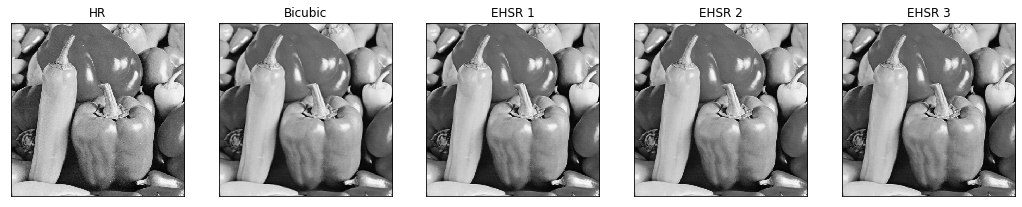

In [222]:
plt.figure(figsize = (18, 10))

plt.subplot(151), plt.imshow(hr_img_cropped, cmap = 'gray')
plt.title("HR"), plt.xticks([]), plt.yticks([])
plt.subplot(152), plt.imshow(bi_img_cropped, cmap = 'gray')
plt.title("Bicubic"), plt.xticks([]), plt.yticks([])
plt.subplot(153), plt.imshow(ehsr_1_cropped, cmap = 'gray')
plt.title("EHSR 1"), plt.xticks([]), plt.yticks([])
plt.subplot(154), plt.imshow(ehsr_2_cropped, cmap = 'gray')
plt.title("EHSR 2"), plt.xticks([]), plt.yticks([])
plt.subplot(155), plt.imshow(ehsr_3_cropped, cmap = 'gray')
plt.title("EHSR 3"), plt.xticks([]), plt.yticks([])
plt.show()


In [223]:
bi_MSE = np.square(np.subtract(bi_img_cropped, hr_img_cropped)).mean()
ehsr1_MSE = np.square(np.subtract(ehsr_1_cropped, hr_img_cropped)).mean()
ehsr2_MSE = np.square(np.subtract(ehsr_2_cropped, hr_img_cropped)).mean()
ehsr3_MSE = np.square(np.subtract(ehsr_3_cropped, hr_img_cropped)).mean()
# subpixel_MSE = np.square(np.subtract(subpixel_cropped, hr_img_cropped)).mean()
print(bi_MSE, ehsr1_MSE, ehsr2_MSE, ehsr3_MSE)

21.03939582684522 20.41752446360373 23.39786752774181 32.455625399531215


In [224]:
bi_PSNR = 20 * math.log10(255.0 / math.sqrt(bi_MSE))
ehsr1_PSNR = 20 * math.log10(255.0 / math.sqrt(ehsr1_MSE))
ehsr2_PSNR = 20 * math.log10(255.0 / math.sqrt(ehsr2_MSE))
ehsr3_PSNR = 20 * math.log10(255.0 / math.sqrt(ehsr3_MSE))
# subpixel_PSNR = 20 * math.log10(255.0 / math.sqrt(subpixel_MSE))
print(bi_PSNR, ehsr1_PSNR, ehsr2_PSNR, ehsr3_PSNR)

34.900470965285386 35.030772762497485 34.439040830789814 33.01790378738049
